In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random

data = pd.read_csv('C:\\Users\\Ashar\\OneDrive - University of Waterloo\\3B\\MSCI 446\\Project Repo\\Data\\test.csv')

#print(data)
plt.scatter(data.x, data.y, color= 'black')
plt.title("French Ethnic Origin")
plt.xlabel("neighbourhood")
plt.ylabel("attribute")
plt.show()


<Figure size 640x480 with 1 Axes>

(array([0.00942606, 0.02639296, 0.0970884 , 0.1951194 , 0.41568915,
        0.72297863, 0.61457897, 0.15552995, 0.01319648]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 <a list of 9 Patch objects>)

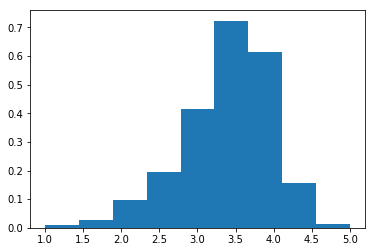

In [2]:
yelp_data = pd.read_csv('C:\\Users\\Ashar\\OneDrive - University of Waterloo\\3B\\MSCI 446\\Project Repo\\Data\\df_toronto_restaurants.csv')

plt.hist(yelp_data.stars, bins=9, density=True)

In [3]:
# one hot encode data
yelp_data.drop(columns=["stars"], inplace=True)
yelp_data_1he = pd.get_dummies(yelp_data)

# convert booleans to 1 and 0
yelp_data_1he['businessAcceptsCreditCards'] = yelp_data_1he['businessAcceptsCreditCards']*1
yelp_data_1he['businessParking'] = yelp_data_1he['businessAcceptsCreditCards']*1
yelp_data_1he['goodForKids'] = yelp_data_1he['goodForKids']*1
yelp_data_1he['restaurantsDelivery'] = yelp_data_1he['restaurantsDelivery']*1
yelp_data_1he['restaurantsGoodForGroups'] = yelp_data_1he['restaurantsGoodForGroups']*1
yelp_data_1he['restaurantsReservations'] = yelp_data_1he['restaurantsReservations']*1
yelp_data_1he['restaurantsTakeOut'] = yelp_data_1he['restaurantsTakeOut']*1

#normalize data
yelp_data_1he_norm = (yelp_data_1he - yelp_data_1he.min()) / (yelp_data_1he.max() - yelp_data_1he.min())

yelp_data_1he_norm.head()

,businessAcceptsCreditCards,businessParking,goodForKids,restaurantsDelivery,restaurantsGoodForGroups,restaurantsPriceRange,restaurantsReservations,restaurantsTakeOut,review_count,alcohol_beer_and_wine,...,noiseLevel_very_loud,restaurantsAttire_casual,restaurantsAttire_dressy,restaurantsAttire_formal,smoking_no,smoking_outdoor,smoking_yes,wiFi_free,wiFi_no,wiFi_paid
0,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0,0.001091,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,1.0,0.064340,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.333333,0.0,1.0,0.011996,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,1.0,0.013086,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0,0.011450,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [4]:
# project onto 2 dimensions
from sklearn.decomposition import PCA
y_pca = PCA(n_components=2, whiten=True).fit_transform(yelp_data_1he_norm)
y_pca

array([[-0.30273306,  1.7951307 ],
       [-1.01223507, -0.1447348 ],
       [-1.03538748, -0.15328602],
       ...,
       [-1.01334819, -0.14372421],
       [ 1.28509482,  0.91037431],
       [ 0.67124944, -1.17606175]])

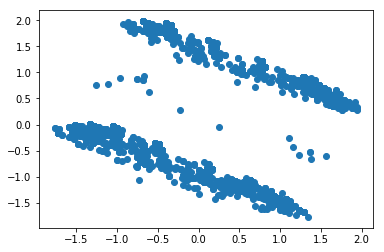

In [5]:
# plot on scatter graph
plt.scatter(y_pca[:,0],y_pca[:,1])

In [6]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=2)

# fit kmeans object to data
kmeans.fit(y_pca)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(y_pca)

[[ 0.65691956  1.12986777]
 [-0.37742542 -0.64915226]]


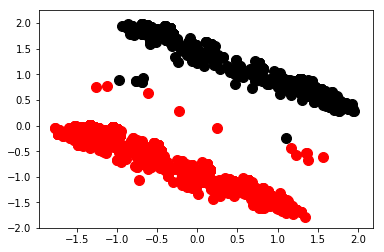

In [7]:
# display cluster
plt.scatter(y_pca[y_km ==0,0], y_pca[y_km == 0,1], s=100, c='red')
plt.scatter(y_pca[y_km ==1,0], y_pca[y_km == 1,1], s=100, c='black')
plt.scatter(y_pca[y_km ==2,0], y_pca[y_km == 2,1], s=100, c='blue')
plt.scatter(y_pca[y_km ==3,0], y_pca[y_km == 3,1], s=100, c='cyan')

In [85]:
# perform analysis
cluster_assigned = kmeans.predict(y_pca)

cluster_assigned1 = np.where(cluster_assigned == 0)
cluster_assigned2 = np.where(cluster_assigned == 1)

# calculate count of each value for categorical/Boolean attributes, and mean for numerical attributes
np.mean(yelp_data.loc[cluster_assigned1[0],'review_count'])
np.mean(yelp_data.loc[cluster_assigned2[0],'restaurantsPriceRange'])
yelp_data.loc[cluster_assigned1[0]].groupby('noiseLevel').count()
yelp_data.loc[cluster_assigned2[0]].groupby('noiseLevel').count()
### repeat above process for other attributes for both clusters ##

,alcohol,businessAcceptsCreditCards,businessParking,goodForKids,restaurantsAttire,restaurantsDelivery,restaurantsGoodForGroups,restaurantsPriceRange,restaurantsReservations,restaurantsTakeOut,smoking,wiFi,review_count
noiseLevel,,,,,,,,,,,,,
average,611,611,611,611,611,611,611,611,611,611,611,611,611
loud,97,97,97,97,97,97,97,97,97,97,97,97,97
quiet,148,148,148,148,148,148,148,148,148,148,148,148,148
very_loud,15,15,15,15,15,15,15,15,15,15,15,15,15


In [9]:
# load yelp and neighbourhood (joined) data
yelp_n_data = pd.read_pickle("446-Project//pkl-data//toronto_rest_and_hoods.pkl")
yelp_n_data.drop(columns=["neighborhood_x", "postal_code", "neighborhood_key", "Ward", "neighborhood_y", "stars"], inplace=True)
yelp_n_data.head()

,alcohol_beer_and_wine,alcohol_full_bar,alcohol_none,businessAcceptsCreditCards_False,businessAcceptsCreditCards_True,businessParking_False,businessParking_True,goodForKids_False,goodForKids_True,noiseLevel_average,...,Labour_Force_Worked_at_home,Labour_Force_Worked_outside_Canada,Labour_Force_No_fixed_workplace_address,Labour_Force_Worked_at_usual_place,Income_and_Shelter_Costs_Average_total_income_of_households_in_2015_dollar,Income_and_Shelter_Costs_Average_total_income_of_one_person_households_in_2015_dollar,Income_and_Shelter_Costs_Market_income_percent,Income_and_Shelter_Costs_Employment_income_percent,Income_and_Shelter_Costs_Wages_salaries_and_commissions_percent,Income_and_Shelter_Costs_Net_self_employment_income_percent
0,0,0,1,0,1,1,0,0,1,1,...,0.350816,0.223404,1,0.538019,0.0897857,0.125405,0.449074,0.559184,0.602273,0.275862
1,0,0,1,0,1,1,0,0,1,0,...,0.350816,0.223404,1,0.538019,0.0897857,0.125405,0.449074,0.559184,0.602273,0.275862
2,0,0,1,0,1,1,0,0,1,1,...,0.350816,0.223404,1,0.538019,0.0897857,0.125405,0.449074,0.559184,0.602273,0.275862
3,0,0,1,0,1,0,1,0,1,0,...,0.350816,0.223404,1,0.538019,0.0897857,0.125405,0.449074,0.559184,0.602273,0.275862
4,0,0,1,0,1,1,0,0,1,0,...,0.350816,0.223404,1,0.538019,0.0897857,0.125405,0.449074,0.559184,0.602273,0.275862


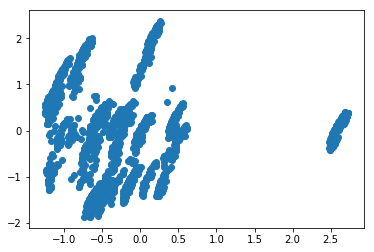

In [141]:
# project onto 2 dimensions
y2_pca = PCA(n_components=2, whiten=True).fit_transform(yelp_n_data)

# plot on scatter graph
plt.scatter(y2_pca[:,0],y2_pca[:,1])

In [157]:
# create kmeans object
kmeans2 = KMeans(n_clusters=5)

# fit kmeans object to data
kmeans2.fit(y2_pca)

# print location of clusters learned by kmeans object
print(kmeans2.cluster_centers_)

# save new clusters for chart
y_km2 = kmeans2.fit_predict(y2_pca)

[[-0.36113244  1.66506439]
 [-0.88771932  0.21445035]
 [ 2.59970549  0.05409086]
 [-0.30400542 -1.18710524]
 [ 0.10106301  0.02250209]]


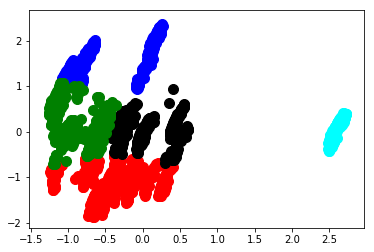

In [158]:
# display cluster
plt.scatter(y2_pca[y_km2 ==0,0], y2_pca[y_km2 == 0,1], s=100, c='red')
plt.scatter(y2_pca[y_km2 ==1,0], y2_pca[y_km2 == 1,1], s=100, c='black')
plt.scatter(y2_pca[y_km2 ==2,0], y2_pca[y_km2 == 2,1], s=100, c='blue')
plt.scatter(y2_pca[y_km2 ==3,0], y2_pca[y_km2 == 3,1], s=100, c='cyan')
plt.scatter(y2_pca[y_km2 ==4,0], y2_pca[y_km2 == 4,1], s=100, c='green')

In [167]:
#np.random.seed(446) # Set seed for simplicity of generating same random indices each time
# Since the explanatory variables are numerous, we are only sampling from certain attributes
# as ranked by importance from the supervised regression analysis
#cluster_rest1 = np.random.choice(cluster_assigned1[0], 10, replace=False)
#cluster_rest2 = np.random.choice(cluster_assigned2[0], 10, replace=False)

# perform analysis
cluster_assignedp = kmeans2.predict(y2_pca)

# calculate mean for numerical attributes
for i in range(0,5):
    cluster_assignedt = np.where(cluster_assignedp == i)
    print("Cluster " + str(i+1) + ": First Generation - " + str(np.mean(yelp_n_data.loc[cluster_assignedt[0],'Canada_Generation_status_First_generation'])))
    print("Cluster " + str(i+1) + ": Canadian Citizen - " + str(np.mean(yelp_n_data.loc[cluster_assignedt[0],'Citizenship_Canadian_citizens'])))
    print("Cluster " + str(i+1) + ": Second Generation - " + str(np.mean(yelp_n_data.loc[cluster_assignedt[0],'Canada_Generation_status_Second_generation'])))
    print("Cluster " + str(i+1) + ": Third Gen+ - " + str(np.mean(yelp_n_data.loc[cluster_assignedt[0],'Canada_Generation_status_Third_generation_or_more'])))
    print("Cluster " + str(i+1) + ": % in Labour Force - " + str(np.mean(yelp_n_data.loc[cluster_assignedt[0],'Labour_Force_In_the_labour_force'])))

Cluster 1: First Generation - 0.15038341427534155
Cluster 1: Canadian Citizen - 0.1756739071121833
Cluster 1: Second Generation - 0.1647067020769225
Cluster 1: Third Gen+ - 0.21903307635447877
Cluster 1: % in Labour Force - 0.25161436877003235
Cluster 2: First Generation - 0.2976382228150698
Cluster 2: Canadian Citizen - 0.32124468678940965
Cluster 2: Second Generation - 0.291136385493925
Cluster 2: Third Gen+ - 0.3894436647970488
Cluster 2: % in Labour Force - 0.4260333901473984
Cluster 3: First Generation - 0.21589877481628636
Cluster 3: Canadian Citizen - 0.31441098678034135
Cluster 3: Second Generation - 0.3357769780559677
Cluster 3: Third Gen+ - 0.35621264901644656
Cluster 3: % in Labour Force - 0.9075620954137945
Cluster 4: First Generation - 0.787676209900003
Cluster 4: Canadian Citizen - 1.0
Cluster 4: Second Generation - 1.0
Cluster 4: Third Gen+ - 1.0
Cluster 4: % in Labour Force - 0.3090674827000011
Cluster 5: First Generation - 0.1793597802472398
Cluster 5: Canadian Citizen